# Predict Silicon Price

### Investigating the relationship between the stock prices of technology companies and the price of silicon

---

imports the necessary libraries for data manipulation, analysis, and visualization.

In [22]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

defines a list of stock tickers, downloads the stock data using the `yfinance` library, and creates a Pandas DataFrame with the stock closing prices.

In [73]:
# Define a list of ticker symbols for clarity and maintainability
tickers = ['AAPL', 'TSLA', 'MSFT', 'NVDA', 'GOOG', 'INTC', 'QCOM', 'KRX', 'AMD', 'ORCL']

# Download stock data in a more efficient way using a loop
stock_data = {}
for ticker in tickers:
    stock_data[ticker] = yf.download(ticker, start='2018-01-01', end='2024-06-06', interval='1wk')['Close']

# Create a DataFrame directly from the dictionary
df_Stock = pd.DataFrame(stock_data)
# Load the metal price data from the CSV file
df_metal = pd.read_csv('./Metal_price.csv')
# Set the 'Date' column as the index of the DataFrame
df_metal.set_index('Date', inplace=True)
# Convert the 'Date' column to datetime format
df_metal.index = pd.to_datetime(df_metal.index)
# Format the 'Date' column to the desired format ('YYYY-MM-DD')
df_metal.index = df_metal.index.strftime('%Y-%m-%d')

df_metal_reset = df_metal.reset_index()

# Drop duplicates based on the 'Date' column, keeping the first occurrence
df_metal_cleaned = df_metal_reset.drop_duplicates(subset='Date', keep='first')

# Optionally, set 'Date' back as the index if desired
df_metal_cleaned = df_metal_cleaned.set_index('Date')

df = df_Stock






scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)
df = df.round(3)


df

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AAPL,TSLA,MSFT,NVDA,GOOG,INTC,QCOM,KRX,AMD,ORCL
Date,,,,,,,,,,
2018-01-01,0.042,0.022,0.003,0.018,0.047,0.452,0.105,1.000,0.011,0.053
2018-01-08,0.045,0.025,0.007,0.020,0.055,0.418,0.098,0.843,0.012,0.066
2018-01-15,0.047,0.028,0.008,0.021,0.061,0.454,0.115,0.859,0.015,0.079
2018-01-22,0.036,0.027,0.020,0.024,0.076,0.576,0.118,0.770,0.017,0.104
2018-01-29,0.019,0.027,0.013,0.022,0.051,0.485,0.102,0.559,0.014,0.073
...,...,...,...,...,...,...,...,...,...,...
2024-05-06,0.910,0.395,0.955,0.736,0.938,0.109,0.824,NaN,0.720,0.867
2024-05-13,0.952,0.418,0.971,0.758,0.992,0.154,0.897,NaN,0.783,0.949
2024-05-20,0.953,0.423,1.000,0.877,0.984,0.129,1.000,NaN,0.793,0.942


In [71]:
df_metal_reset = df_metal.reset_index()

# Drop duplicates based on the 'Date' column, keeping the first occurrence
df_metal_cleaned = df_metal_reset.drop_duplicates(subset='Date', keep='first')

# Optionally, set 'Date' back as the index if desired
df_metal_cleaned = df_metal_cleaned.set_index('Date')

# Display the cleaned DataFrame
df_metal_cleaned

,Gold,Platinium,Palladium,Silver
Date,,,,
2019-07-13,45775.43,27294.78,48678.41,525.30
2019-07-23,46245.23,27494.60,48837.07,524.35
2019-08-02,48267.67,27749.39,45903.16,546.91
2019-08-12,48311.72,27479.56,47834.94,550.78
2019-08-22,48886.50,30060.14,47774.98,590.64
...,...,...,...,...
2024-04-27,74785.21,30842.53,31604.18,882.70
2024-05-07,76452.87,34218.04,31887.11,954.09
2024-05-17,75145.38,33217.91,31215.96,981.18


creates a line plot to visualize the stock prices over time for the selected tickers.

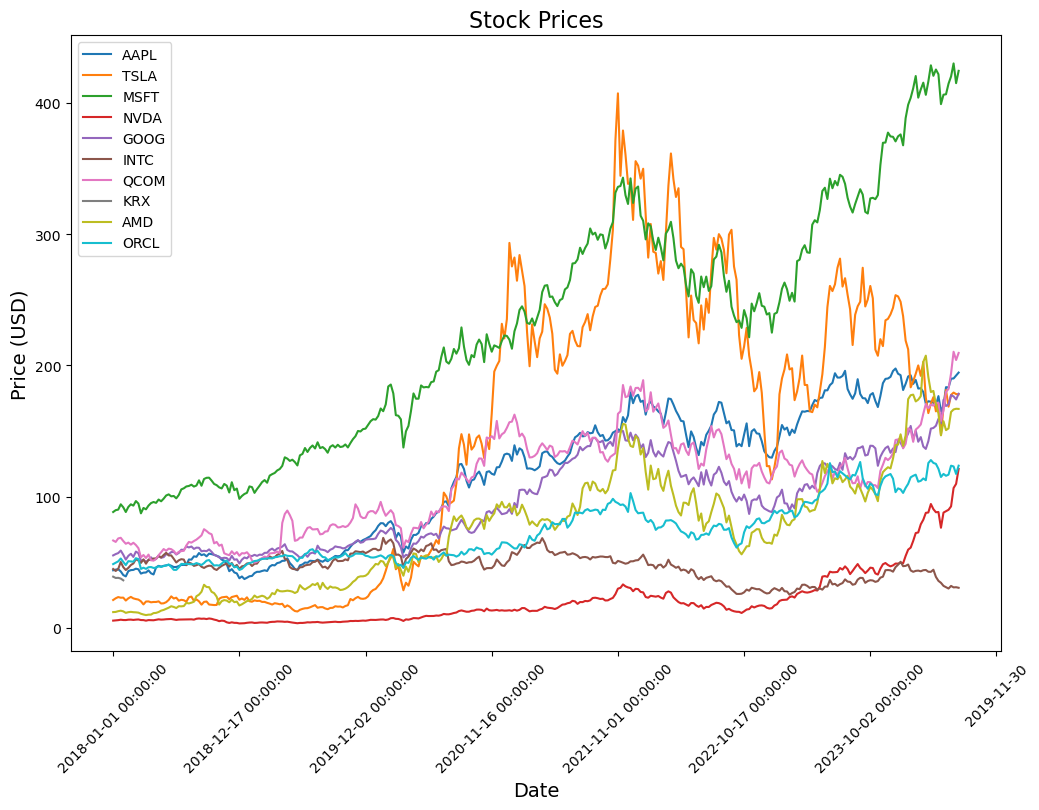

In [60]:
# creates a line plot to visualize the stock prices over time for the selected tickers.

fig, ax = plt.subplots(figsize=(12, 8))
for ticker in tickers:
    df[ticker].plot(ax=ax, label=ticker)

# Set the title and axis labels
ax.set_title('Stock Prices', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Price (USD)', fontsize=14)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the legend
ax.legend()

# Show the plot
plt.show()

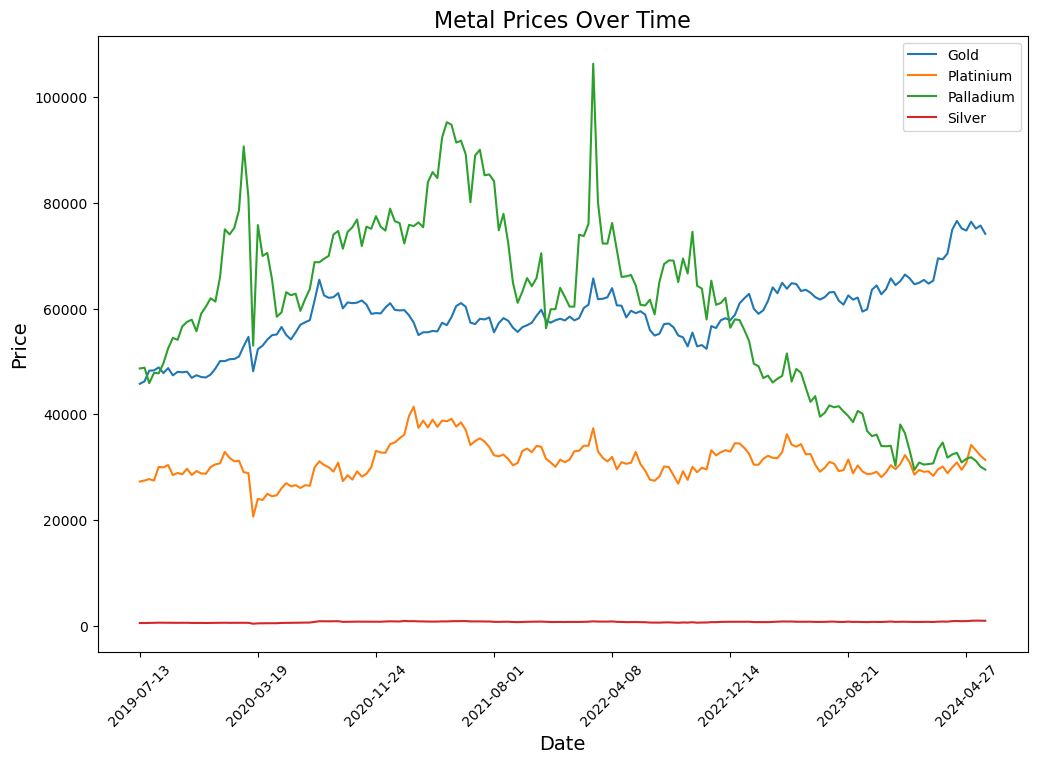

In [61]:


fig, ax = plt.subplots(figsize=(12, 8))

# Assuming you want to plot all metals in the same figure
metals = ['Gold', 'Platinium', 'Palladium', 'Silver']
for metal in metals:
    df_metal[metal].plot(ax=ax, label=metal)

# Set the title and axis labels
ax.set_title('Metal Prices Over Time', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Price', fontsize=14)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the legend
ax.legend()

# Show the plot
plt.show()

---

loads the silicon price data from an Excel file, creates new columns for the converted dollar and euro prices, and visualizes the silicon prices over time using line plots.

In [62]:
silicon_price = pd.read_excel('./Silicon_price.xlsx')

silicon_price['Dollar_Price_rotate'] = silicon_price['U.S. Price'] * 537.5
silicon_price['Euro_Price_rotate'] = silicon_price['U.S. Price'] * 687.2

silicon_price.head(3)

,Date,U.S. Price,Euro Price,Dollar_Price_rotate,Euro_Price_rotate
0,2018-01-01,3.05,2.35,1639.375,2095.960
1,2018-02-01,3.13,2.39,1682.375,2150.936
2,2018-03-01,3.15,2.40,1693.125,2164.680


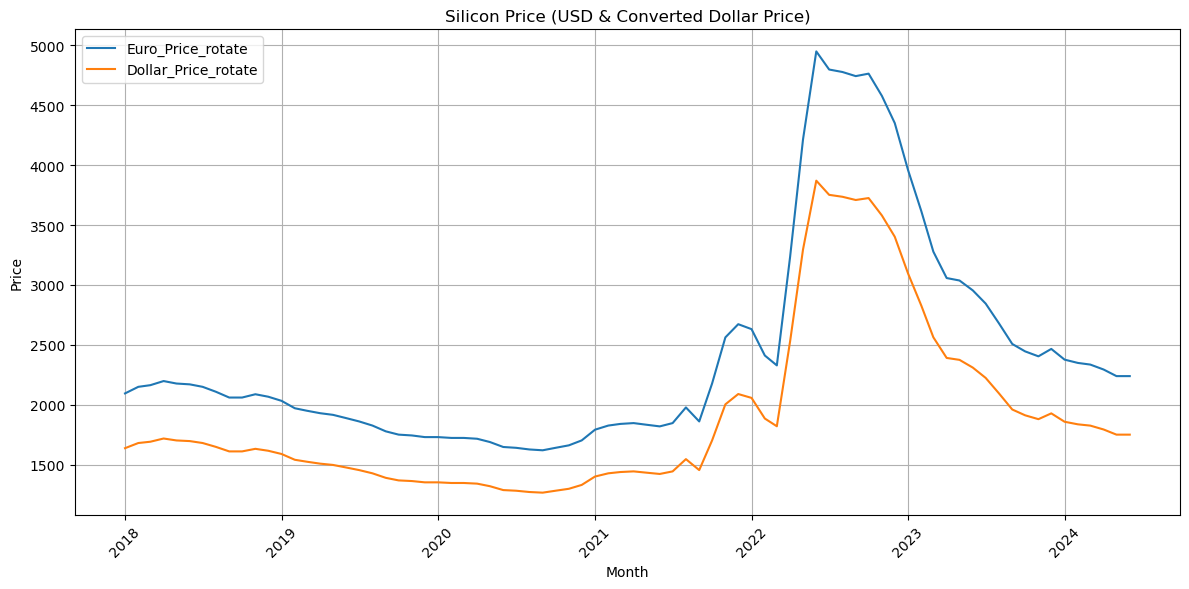

In [63]:
data_to_plot = ['Euro_Price_rotate', 'Dollar_Price_rotate']

# Create the plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(silicon_price['Date'], silicon_price[data_to_plot])
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Silicon Price (USD & Converted Dollar Price)')

# Add labels for each line
plt.legend(data_to_plot, loc='upper left')

# Rotate x-axis labels for better readability with many data points
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


<Axes: xlabel='Date'>

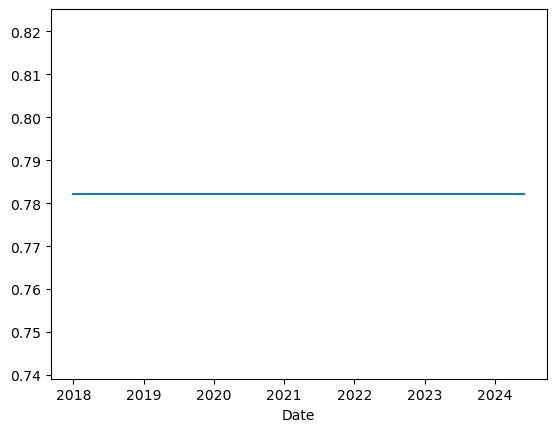

In [64]:
sns.lineplot(
    x=silicon_price['Date'], y=(silicon_price['Dollar_Price_rotate'] / silicon_price['Euro_Price_rotate'])
)

# Missing Value Handling and Clean Data

In [65]:
df.isna().sum()

AAPL         180
TSLA         180
MSFT         180
NVDA         180
GOOG         180
INTC         180
QCOM         180
KRX          510
AMD          180
ORCL         180
Gold         336
Platinium    336
Palladium    336
Silver       336
dtype: int64

In [66]:
df['Price_ratio'] = silicon_price['Euro_Price_rotate']

# df['KRX'] = df_metal['KRX'].interpolate(method='linear')
# df['Gole_Price'] = df_metal['Gold_Price'].interpolate(method='linear')
# df['Platinium_Price'] = df_metal['Platinium_Price'].interpolate(method='linear')
# df['Palladium_Price'] = df_metal['Palladium_Price'].interpolate(method='linear')
# df['Silver_Price'] = df_metal['Silver_Price'].interpolate(method='linear')
df['Price_ratio'] = df_metal['Price_ratio'].interpolate(method='linear')




df.isna().sum()

KeyError: 'Price_ratio'

In [ ]:
df_metal = df_metal.dropna()

In [ ]:
abs(df_metal.corr()).style.background_gradient(cmap='Greens')

,Gold,Platinium,Palladium,Silver,Price_ratio
Gold,1.000000,0.162600,0.480719,0.747369,0.684231
Platinium,0.162600,1.000000,0.379988,0.672977,0.010406
Palladium,0.480719,0.379988,1.000000,0.013100,0.753204
Silver,0.747369,0.672977,0.013100,1.000000,0.343433
Price_ratio,0.684231,0.010406,0.753204,0.343433,1.000000


In [ ]:
df['KRX'] = df['KRX'].interpolate(method='linear')

silicon_price.set_index('Date', inplace=True)
df['Price_ratio'] = silicon_price['Euro_Price_rotate']
df['Price_ratio'] = df['Price_ratio'].interpolate(method='linear')
df.isna().sum()

AAPL           0
TSLA           0
MSFT           0
NVDA           0
GOOG           0
INTC           0
QCOM           0
KRX            0
AMD            0
ORCL           0
Price_ratio    0
dtype: int64

In [ ]:
df = df.dropna()

# Start ML Modeling
---

imports various machine learning models and functions from the scikit-learn library.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [ ]:
abs(df.corr()).style.background_gradient(cmap='Greens')

,AAPL,TSLA,MSFT,NVDA,GOOG,INTC,QCOM,KRX,AMD,ORCL,Price_ratio
AAPL,1.000000,0.894012,0.959490,0.732564,0.927427,0.481469,0.871034,0.218514,0.914233,0.891717,0.557529
TSLA,0.894012,1.000000,0.810498,0.476573,0.855016,0.298493,0.859955,0.182717,0.795209,0.694812,0.592774
MSFT,0.959490,0.810498,1.000000,0.853343,0.959144,0.400896,0.867404,0.229534,0.970716,0.937018,0.411202
NVDA,0.732564,0.476573,0.853343,1.000000,0.797149,0.426269,0.662502,0.109719,0.842962,0.872742,0.181346
GOOG,0.927427,0.855016,0.959144,0.797149,1.000000,0.325347,0.887255,0.182675,0.931085,0.898001,0.432872
INTC,0.481469,0.298493,0.400896,0.426269,0.325347,1.000000,0.242413,0.010620,0.303252,0.505851,0.685721
QCOM,0.871034,0.859955,0.867404,0.662502,0.887255,0.242413,1.000000,0.186950,0.900404,0.714559,0.412173
KRX,0.218514,0.182717,0.229534,0.109719,0.182675,0.010620,0.186950,1.000000,0.222773,0.154702,0.072597
AMD,0.914233,0.795209,0.970716,0.842962,0.931085,0.303252,0.900404,0.222773,1.000000,0.874354,0.326401
ORCL,0.891717,0.694812,0.937018,0.872742,0.898001,0.505851,0.714559,0.154702,0.874354,1.000000,0.378929


In [ ]:
X = df[tickers]
y = df['Price_ratio']

X_train = X[:-120]
X_test = X[-120:]
y_train = y[:-120]
y_test = y[-120:]

---

trains a linear regression model on the training data and evaluates its performance on the test data using the R-squared metric.

In [ ]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

print(f'r2_ Linear Reggresion Model: {r2_score(y_test, y_pred)}')

r2_ Linear Reggresion Model: -6.8484266999277725


using StandardScaler, trains a Support Vector Regression (SVR) model with an RBF kernel on the scaled training data, and evaluates its performance on the test data using the R-squared metric.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf')  # Using Radial basis function kernel
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

print(f'r2_Support Vector Regression: {r2_score(y_test, y_pred_svr)}')


r2_Support Vector Regression: -2.7623652657142537


trains a Decision Tree Regressor model on the training data and evaluates its performance on the test data using the R-squared metric.

In [ ]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

print(f'r2_Decision Tree Regressor: {r2_score(y_test, y_pred_dtr)}')


r2_Decision Tree Regressor: -2.250240835772866


trains a Random Forest Regressor model with 100 estimators on the training data and evaluates its performance on the test data using the R-squared metric.

In [ ]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

print(f'r2_Random Forest Regressor: {r2_score(y_test, y_pred_rfr)}')

r2_Random Forest Regressor: -2.0807139977739757


trains a Ridge Regression model with an alpha value of 1.0 on the training data and evaluates its performance on the test data using the R-squared metric.

In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print(f'r2_Ridge Regression: {r2_score(y_test, y_pred_ridge)}')

r2_Ridge Regression: -6.819381240016956


trains a Lasso model with an alpha value of 1.0 on the training data and evaluates its performance on the test data using the R-squared metric.

In [ ]:
lasso = Lasso(alpha=0.1)  # alpha is the regularization strength
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print(f'r2_Lasso Regression: {r2_score(y_test, y_pred_lasso)}')

r2_Lasso Regression: -6.847643925229589


c:\Users\Mr\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.346e+06, tolerance: 2.557e+03
  model = cd_fast.enet_coordinate_descent(


trains a elastic net model with an alpha value of 1.0 & l1_ratio value of 0.5 on the training data and evaluates its performance on the test data using the R-squared metric.

In [ ]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # alpha is the regularization strength; l1_ratio controls the mix of L1 and L2 regularization
elastic_net.fit(X_train, y_train)
y_pred_elastic_net = elastic_net.predict(X_test)

print(f'r2_Elastic Net Regression: {r2_score(y_test, y_pred_elastic_net)}')

r2_Elastic Net Regression: -6.553398681678737


c:\Users\Mr\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.587e+06, tolerance: 2.557e+03
  model = cd_fast.enet_coordinate_descent(
